# Design Optimization, Experiment Design, Data Collection and Analysis

Vertical Displacement vs. End Effector Stiffness

Matthew Nolan

## Background and Experimental Setup

**Background**

One important measure of a walking robot's performance is the vertical displacement of the body achieved during the gait cycle. This parameter is an important feature of the cyclic energy exchange between kinetic and gravitational potential energy that makes up most walking gaits. Furthermore, for animals whose bodies remain close to the ground, the vertical displacement impacts the animal's ability to navigate over obstacles and rough terrain.

In rigid-body robotics, this vertical displacement can often be directly calculated as a function of the kinematics of the gait trajectory. However, for soft or flexible robots, this task becomes much more challenging because material deformation needsto be considered. For our particular test setup, the front two wheels of the test rig will not lift off the ground for certain configurations, causing the resulting motion to approximate a dog leg paddling on a skateboard rather than a dog leg lifting and carrying the body through a gait cycle. Because this performance affects the ability for this test platform to facilitate research on canine-inspired locomotion in other areas, it is important to understand what system setups lend themselves to adequate vertical displacements. In particular, the stiffness of the flexible end-effector will be tuned to maximize the vertical displacement (henceforth called "delta y") of the test rig above the leg.

The test rig in question is shown below, consisting of a foldable, laminate 5-bar structure (described in more detail in the Manufacturing Computation page) that is supported by a wooden test platform resting on 4 wheels. The intention of this platform is that as the leg moves through its gait cycle, it lifts the front two wheels off the ground, thereby carrying part of the weight of the body upward and forward.

<img src='https://drive.google.com/uc?id=1XcnkMwtWpGB8FokGGbs2veei4I2nIGiS' width="500">

<img src='https://drive.google.com/uc?id=1n1oReH5okVCuRWmQZIIdvUzwTq02GJ-a' width="500">



**Optimization Approach and Experimental Setup**

Ideally, the system dynamics simulation would be utilized in conjunction with an optimization routine in order to find a stiffness that truly maximizes the delta y of the top front of the test rig. Unfortunately, this approach has two large barriers. First, the system dynamics simulation takes a very long time to run, so an optimization routine  that effectively runs the simulation repeatedly would take hours, if not days. Second, when the mechanism is freed from the Newtonian frame in the system dynamics code, its motion does not accurately represent that of the real system.

Facing these difficulties, a purely experimental approach was utlilized instead. Several end effectors of slightly different thicknesses (specifically, 1.5mm, 2mm, 2.5mm, 3mm, and 3.5mm nominal) were 3D printed out of nylon, and their stiffnesses were approximated using the same techniques described in the Parameter ID pages (guess-and-check using a simple 2-link model of the flexible member, with a torsional spring at the intermediary joint). These thicknesses were chosen because the thickness studied in the Parameter ID (i.e. 1.5mm) was observed to deform greatly in the system dynamics simulation, and physical testing of this thickness indicated that it would be insufficient to lift the weight of the test rig. 

For each studies stiffness, the corresponding end effector was bolted to the mechanism, and its motion was studied by taking video and using a motion tracking software to track the delta y of the front end of the test rig. The wheels of the rig were held to prevent translation in x during these tests because only the delta y was of interest. An example of one of the test videos is shown below.

In [1]:
from IPython.display import HTML
HTML(f"""<video src='https://drive.google.com/uc?id=1yvNV3Dqhl3lQOul_HgXuNnTCo3rVqW5c' width=800 controls/>""")

## Results

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Change current working directory to import files more easliy

In [3]:
cd /content/drive/Shareddrives/EGR 557 Group Project/Design Optimization, Experiment Design, Data Collection, and Analysis/Stiffness vs. Max Height/Tracking Data

/content/drive/Shareddrives/EGR 557 Group Project/Design Optimization, Experiment Design, Data Collection, and Analysis/Stiffness vs. Max Height/Tracking Data


In [4]:
ee1 = pd.read_csv(r'1_51.txt', sep='\t')
ee1 = np.array(ee1) # convert to numpy array. Column order is time, y position
ee1 = np.delete(ee1, 2, axis=1) # remove the final column, which is just a bunch of nan's
ee1 = np.delete(ee1, 0, axis=0) # remove the first row, which is the column headers
ee1 = ee1.astype(float)

ee2 = pd.read_csv(r'2_10.txt', sep='\t')
ee2 = np.array(ee2) # convert to numpy array. Column order is time, y position
ee2 = np.delete(ee2, 2, axis=1) # remove the final column, which is just a bunch of nan's
ee2 = np.delete(ee2, 0, axis=0) # remove the first row, which is the column headers
ee2 = ee2.astype(float)

ee3 = pd.read_csv(r'2_62.txt', sep='\t')
ee3 = np.array(ee3) # convert to numpy array. Column order is time, y position
ee3 = np.delete(ee3, 2, axis=1) # remove the final column, which is just a bunch of nan's
ee3 = np.delete(ee3, 0, axis=0) # remove the first row, which is the column headers
ee3 = ee3.astype(float)

ee4 = pd.read_csv(r'3_15.txt', sep='\t')
ee4 = np.array(ee4) # convert to numpy array. Column order is time, y position
ee4 = np.delete(ee4, 2, axis=1) # remove the final column, which is just a bunch of nan's
ee4 = np.delete(ee4, 0, axis=0) # remove the first row, which is the column headers
ee4 = ee4.astype(float)

ee5 = pd.read_csv(r'3_63.txt', sep='\t')
ee5 = np.array(ee5) # convert to numpy array. Column order is time, y position
ee5 = np.delete(ee5, 2, axis=1) # remove the final column, which is just a bunch of nan's
ee5 = np.delete(ee5, 0, axis=0) # remove the first row, which is the column headers
ee5 = ee5.astype(float)

Plotting the raw data for each run

Text(0.5, 1.0, 'y position vs. time for ee5')

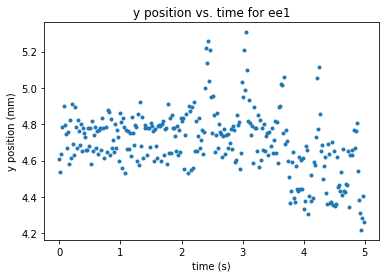

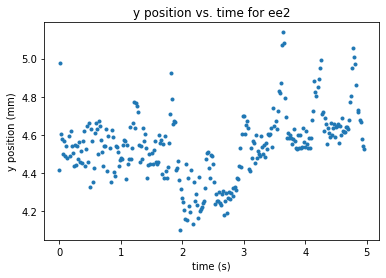

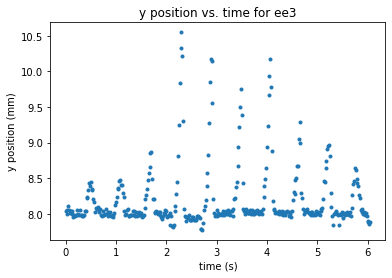

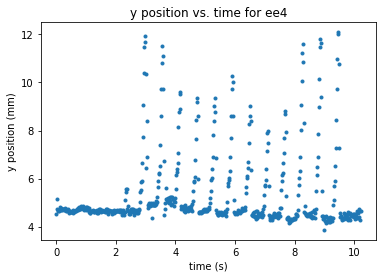

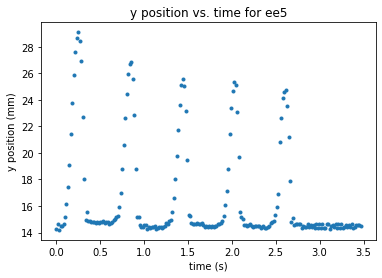

In [5]:
plt.figure()
plt.plot(ee1[:,0], ee1[:,1],'.')
plt.xlabel('time (s)')
plt.ylabel('y position (mm)')
plt.title('y position vs. time for ee1')

plt.figure()
plt.plot(ee2[:,0], ee2[:,1],'.')
plt.xlabel('time (s)')
plt.ylabel('y position (mm)')
plt.title('y position vs. time for ee2')

plt.figure()
plt.plot(ee3[:,0], ee3[:,1],'.')
plt.xlabel('time (s)')
plt.ylabel('y position (mm)')
plt.title('y position vs. time for ee3')

plt.figure()
plt.plot(ee4[:,0], ee4[:,1],'.')
plt.xlabel('time (s)')
plt.ylabel('y position (mm)')
plt.title('y position vs. time for ee4')

plt.figure()
plt.plot(ee5[:,0], ee5[:,1],'.')
plt.xlabel('time (s)')
plt.ylabel('y position (mm)')
plt.title('y position vs. time for ee5')

Because the coordinate frame is set up slightly differently for each run, the maximum displacement (that is, the max value minus the min value) will be used to compare the runs.

In [6]:
dy1 = max(ee1[:,1]) - min(ee1[:,1])
dy2 = max(ee2[:,1]) - min(ee2[:,1])
dy3 = max(ee3[:,1]) - min(ee3[:,1])
dy4 = max(ee4[:,1]) - min(ee4[:,1])
dy5 = max(ee5[:,1]) - min(ee5[:,1])


Next, an array for the end effector stiffnesses is defined, and the delta y is plotted against the end effector stiffness.

Text(0.5, 1.0, 'Vertical Displacement vs. Effective End Effector Stiffness')

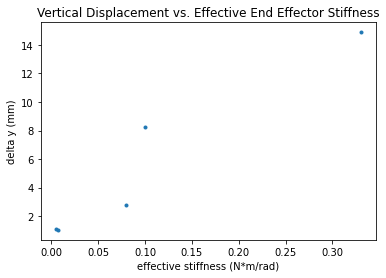

In [7]:
k = [5.03e-03, 7.00e-03, 8.00e-02, 1.00e-01, 3.30e-01]
dy= [dy1, dy2, dy3, dy4, dy5]
plt.figure()
plt.plot(k,dy,".")
plt.xlabel("effective stiffness (N*m/rad)")
plt.ylabel("delta y (mm)")
plt.title("Vertical Displacement vs. Effective End Effector Stiffness")

In order to fit this data, a quadratic spline regression will be used. Because of the scarce number of data points, care will need to be taken not to overfit the data. 

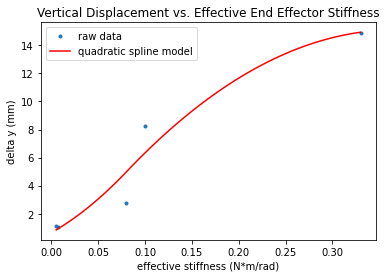

In [8]:
fit= UnivariateSpline(k,dy,k=2,s=8.5)
t = np.linspace(min(k),max(k),100)
plt.figure()
plt.plot(k,dy,".",label="raw data")
plt.plot(t,fit(t),'r', label="quadratic spline model")
plt.xlabel("effective stiffness (N*m/rad)")
plt.ylabel("delta y (mm)")
plt.title("Vertical Displacement vs. Effective End Effector Stiffness")
plt.legend()


## Discussion

The experimental setup was fairly consistent and repeatable. One very beneficial upgrade to previous setups was the addition of a phone camera tripod to assist with filming, which ensured that there was no camera motion and that the height of the filming was optimal. The white background also made it easy for the Tracker software to track the front corner of the test rig as it bounced up and down, with only a few manual corrections required.

However, for the position in question, some frames of the video tracking had to be roughly estimated because motion blur smeared the image out, so a higher camera framerate would be beneficial.In addition, holding the wheels of the test rig in order to constrain it in x often led to undesirable out-of-plane motion, which had to be clipped from the videos before the tracking was applied in order to avoid significant alignment errors. A more consistent method of constraining the test rig would be helpful for future tests.

A quadratic scipy.interpolate.UnivatiateSpline object was used to define the model and fit the resulting data. The model is very user-adjustable and the amount of over-fitting can easily be tuned using the "s" parameter, which defines the number of knots in the spline. This model is well-documented in the SciPy Documentation. The quadratic spline model approximats the overall shape of the data reasonably well, but it could not be adjusted to better represent the interior data points without overfitting. Its weighted sum of squared residuals is shown below.

In [9]:
print(f"The delta y vs. stiffness modl has an weighted sum of squared residuals of {fit.get_residual():.5f}")

The delta y vs. stiffness modl has an weighted sum of squared residuals of 8.50004


There are three important takeaways from the results of this experiment. First, and most obviously, the achievable vertical displacement increases with increasing end-effector stiffness. This conclusion seems obvious, but the data still conveys interesting information about the minimum viable stiffness that allows the test rig to lift its front wheels off the ground. The first two end effectors that were tested were barely able to lift the rig at all. This information about the lower bound for viable stiffnesses can help inform future stiffness-based experiments.

Second, the stiffness of the 3D-printed nylon end effectors is very nonlinear with respect to the thickness of said end effectors. This is important to consider when designing links for a certain stiffness.

Finally, there appears to be a considerable "steep" region of the data where the maximum delta y increases dramatically with respect to the stiffness. Past this region, the benefit of adding additional stiffness appears to drop off. This makes sense because as the "flexible" member approaches a perfectly stiff link, the delta y approaches the maximum theoretical value that can be calculated using rigid body kinematics.

Future experimentation regarding these two variables may focus on the interaction between  stiffness and the overall gait size, as stiffer end effectors may enable smaller tip paths for the same achieved y displacement, and vice versa. Another significant improvement to the study would rely on constructing a full quadrupedal robot based on this leg design and allowing the entire body to move up and down throughout the gait cycle. This could be especially revealing if the x motion were not constrained and the dynamic interchange betwen kinetic and gravitational potential energy were allowed to play out. Such an experiment would likely provide the most realistic insight into how induced stiffnesses in dog legs contribute to the achievable vertical displacement.